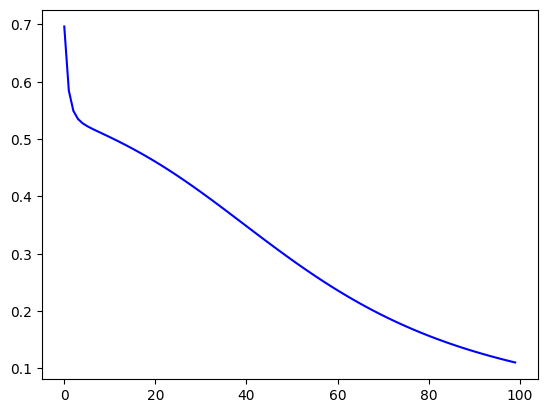

In [1]:
# -*- coding: utf-8 -*-

import torch
import matplotlib.pyplot as plt


class Neural_Network(torch.nn.Module):
  
  def __init__(self):
    super(Neural_Network, self).__init__()
    self.layer1 = torch.nn.Linear(2, 2)
    self.layer2 = torch.nn.Linear(2, 1)
    
    # manually set weights
    self.layer1.weight.data = torch.tensor([[1.0, 0.0],
                                            [0.0, 1.0]])
    
    self.layer1.bias.data = torch.tensor([[0.0, 0.0]])
    
    self.layer2.weight.data = torch.tensor([[1.0, -1.0]])
    
    self.layer2.bias.data = torch.tensor([[0.0]])
    
  def forward(self, x):
    x = self.layer1(x)
    x = torch.sigmoid(x)
    x = self.layer2(x)
    x = torch.sigmoid(x)
    return x
    
if __name__ == "__main__":
  
  X = torch.tensor([[0.0, 0.0],
                    [0.0, 1.0],
                    [1.0, 0.0],
                    [1.0, 1.0]])
  
  Y = torch.tensor([[0.0],
                    [1.0],
                    [1.0],
                    [1.0]])
    
  net = Neural_Network()
  
  criterion = torch.nn.BCELoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=1.0)
  
  # training
  number_of_steps = 100
  empirical_risk_logging = list()
  
  for epoch in range(number_of_steps):
    optimizer.zero_grad()
    
    Y_hat = net(X)
    
    loss = criterion(Y_hat, Y)

    loss.backward()
    optimizer.step()
    
    empirical_risk_logging.append(loss.item())
        
  plt.plot(list(range(number_of_steps)), empirical_risk_logging, color="blue")
  plt.show()